In [1]:
# 필요 라이브러리 import 
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 윈저사이저 적용
df1 = pd.read_csv('../데이터자료/Lasso_sampling_smotEEN.csv',encoding='CP949')
df2 = pd.read_csv('../데이터자료/label지정.csv', encoding='cp949')

for col in df1.columns:
     df1[col] = winsorize(df1[col], limits= 0.01)

df1.columns

FileNotFoundError: [Errno 2] No such file or directory: '../데이터자료/Lasso_sampling_smotEEN.csv'

In [78]:
df2 =df2.reset_index(drop="index")
df2.describe()

거래소코드          소속코드     [제조]매출액증가율    [제조]유형자산증가율  \
count   10662.000000  10662.000000   10662.000000   10662.000000   
mean    92074.287188      4.993341      28.056523      84.564483   
std    106083.269592      0.354335    1454.454305    3093.493880   
min       250.000000      4.000000    -100.000000    -100.000000   
25%     39240.000000      5.000000      -9.657500      -5.257500   
50%     65950.000000      5.000000       4.300000       1.440000   
75%    105330.000000      5.000000      19.100000      17.970000   
max    950200.000000      6.000000  149805.530000  295498.650000   

       [제조]비유동자산증가율    [제조]총자본증가율   [제조]자기자본증가율   [제조]유동자산증가율    [제조]순이익증가율  \
count  10662.000000  10662.000000  10662.000000  10662.000000  1.066200e+04   
mean      21.639397     13.746344     22.626214     17.352542  6.212778e+02   
std      129.847723     51.742527    354.943960     82.628720  6.254670e+04   
min      -99.470000    -95.840000  -1068.120000    -98.810000 -1.522079e+05   
25%       -4.167500     -3.217500     -1.920000     -8.830000 -3.159750e+01   
50%        4.485000      5.520000      5.870000      5.535000  0.000000e+00   
75%       21.067500     17.827500     17.110000     23.542500  3.889500e+01   
max     7919.440000   2579.670000  34640.710000   4274.050000  6.452079e+06   

         [제조]재고자산증가율  ...    [제조]기계투자효율     [제조]부가가치율    [제조]노동소득분배율  \
count   10662.000000  ...  1.066200e+04  10662.000000   10662.000000   
mean       87.858023  ...  1.485140e+06     10.562375     111.876595   
std      3275.800579  ...  5.170670e+07    224.658324    1419.551265   
min       -99.970000  ... -2.657909e+09 -13958.620000       0.000000   
25%       -11.220000  ...  7.957000e+01     12.020000      38.280000   
50%         0.000000  ...  2.685100e+02     21.785000      57.065000   
75%        22.117500  ...  1.303918e+03     34.447500      76.037500   
max    313488.540000  ...  1.418999e+09   2377.220000  116801.060000   

           [제조]자본분배율      [제조]이윤분배율   [제조]유형자산회전율  [제조]이자보상배율(이자비용)  \
count   10662.000000   10662.000000  10662.000000      1.066200e+04   
mean      -23.525442     -73.331389     14.732072      1.894793e+05   
std      1418.995549    2107.927519    102.169681      1.369595e+07   
min   -116701.060000 -190075.340000      0.000000     -4.493653e+06   
25%         2.385000      -0.297500      1.660000     -6.875000e-01   
50%        35.020000      10.985000      3.030000      2.470000e+00   
75%        52.097500      28.827500      6.407500      1.707750e+01   
max        99.180000    3373.680000   6295.580000      1.000000e+09   

               year    month         label  
count  10662.000000  10662.0  10662.000000  
mean    2015.869818     12.0      0.015757  
std        2.882518      0.0      0.124539  
min     2011.000000     12.0      0.000000  
25%     2013.000000     12.0      0.000000  
50%     2016.000000     12.0      0.000000  
75%     2018.000000     12.0      0.000000  
max     2020.000000     12.0      1.000000  

[8 rows x 53 columns]

In [79]:
# train test set 분리
df1  #train 
df2 = df2[df2['year']>=2019]  #test
# train data label 분리 test data label 분리
X_train= df1[['[제조]유동자산구성비율', '[제조]순운전자본비율', '[제조]매입채무회전기간', '[제조]총자본증가율',
       '[제조]매출채권회전률', '[제조]매출액순이익률', '[제조]노동소득분배율', '[제조]자기자본순이익률',
       '[제조]재고자산증가율']]
X_test = df2[['[제조]유동자산구성비율', '[제조]순운전자본비율', '[제조]매입채무회전기간', '[제조]총자본증가율',
       '[제조]매출채권회전률', '[제조]매출액순이익률', '[제조]노동소득분배율', '[제조]자기자본순이익률',
       '[제조]재고자산증가율',]]
y_train = df1["label"]
y_test = df2["label"]

# x_train_scaled= StandardScaler().fit_transform(X_train)
# x_test_scaled = fit_transform(X_test)
# # df_data_scaled= MinMaxScaler().fit_transform(df_data)
# X_train_scaled = pd.DataFrame(x_train_scaled)
X_test.describe()

[제조]유동자산구성비율  [제조]순운전자본비율  [제조]매입채무회전기간   [제조]총자본증가율  [제조]매출채권회전률  \
count   2567.000000  2567.000000   2567.000000  2567.000000  2567.000000   
mean      53.098029    23.507811     30.777717    15.547764    10.964246   
std       19.038670    28.462693     38.809046    68.692552    39.041133   
min        2.200000  -319.880000      0.000000   -77.380000     0.000000   
25%       39.830000     4.830000     11.675000    -3.090000     4.340000   
50%       53.200000    23.800000     23.170000     5.720000     6.440000   
75%       66.710000    43.360000     38.725000    18.880000    10.185000   
max       99.110000    95.740000    558.620000  2579.670000  1294.310000   

        [제조]매출액순이익률   [제조]노동소득분배율  [제조]자기자본순이익률   [제조]재고자산증가율  
count   2567.000000   2567.000000   2567.000000   2567.000000  
mean     -53.778948    100.479260     -9.227491     61.016139  
std      655.393621    560.179708     85.528816   1045.201141  
min   -22244.140000      0.000000  -3342.120000    -99.970000  
25%       -9.990000     36.605000    -10.490000    -13.100000  
50%        1.830000     58.090000      2.320000      0.000000  
75%        8.605000     78.440000      9.570000     19.765000  
max     2096.990000  22235.240000    154.560000  45037.040000

In [80]:
# 기본적인 LDA 구현
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train,y_train)
lda_pred = lda_clf.predict(X_test)
lda_pred_proba = lda_clf.predict_proba(X_test)

In [81]:
from sklearn.model_selection import GridSearchCV


In [82]:
# 디시전트리 구현
from sklearn.tree import DecisionTreeClassifier       
dt_clf = DecisionTreeClassifier(random_state=52)     
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)

In [83]:
tree = DecisionTreeClassifier()

# 딕셔너리로 전달
# key: 하이퍼파라미터 명; value: [후보값들] 을 리스트로 전달
param_grid = {
    'max_depth':[2,3,4,5,6,7,8], #7개
    'min_samples_leaf':[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]  #4개 --> 7x4 = 총 28개의 조합
}
grid_search = GridSearchCV(tree
                          , param_grid = param_grid
                          , cv = 5 #교차검증시 fold 개수; n번의 교차검증; 데이터들이 돌아가면서 하나씩 검증(validation)에 사용되어 일반화하는 것; 데이터가 많지 않을 때 보통 쓰인다고 함
                          , n_jobs = -1)  #-1: 모든 코어 사용

grid_search.fit(X_train, y_train)

# 최선의 결과 출력
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid_search.best_params_, grid_search.best_score_))

최적 하이퍼 파라미터 :{'max_depth': 8, 'min_samples_leaf': 5}, 최적 평균 정확도 :0.924


In [84]:
#최적 하이퍼 파라미터 적용 디시전 트리  
#최적 하이퍼 파라미터 :{'max_depth': 8, 'min_samples_leaf': 5}, 최적 평균 정확도 :0.983
  
dt_clf_best = DecisionTreeClassifier(random_state=52,max_depth= 8,min_samples_leaf=5)     
dt_clf_best.fit(X_train, y_train)
dt_best_pred = dt_clf_best.predict(X_test)
dt_best_pred_proba = dt_clf_best.predict_proba(X_test)

In [85]:
# 랜덤포레스트 구현
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=52)     
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)

In [86]:
# # 하이퍼파라미터 Grid-Search
# from sklearn.model_selection import GridSearchCV

# # 탐색 범위 정의
# grid_search = {'criterion': ['entropy', 'gini'],
#                'max_depth': [2,4,6,8],
#                'max_features': ['auto', 'sqrt'],
#                'min_samples_leaf': [4,6,8.10],
#                'min_samples_split': [4,6,8,10],
#                'n_estimators': [20,40,60,80,100]}

# model = RandomForestClassifier()
# grid = GridSearchCV(estimator = model, param_grid = grid_search, 
#                                cv = 4,verbose=0, n_jobs = -1)
# grid.fit(X_train,y_train)

# # 최선의 결과 출력
# print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid.best_params_, grid.best_score_))


In [87]:
# 랜덤 포레스트 최적 하이퍼 파라미터 적용
# 최적 하이퍼 파라미터 최적 하이퍼 파라미터 :{'criterion': 'gini', 
# 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 80}
rf_clf_best = RandomForestClassifier(random_state=52, criterion = 'entropy', max_features= 'sqrt',
                                     max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=80)
rf_clf_best.fit(X_train, y_train)
rf_best_pred = rf_clf_best.predict(X_test)
rf_best_pred_proba = rf_clf_best.predict_proba(X_test)

In [88]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)


In [89]:
#로지스틱 회귀 최적 하이퍼 파라미터
from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l2','l1','elasticnet','None'],
          'C':[0.01,0.1,1,1,5,10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=5)
grid_clf.fit(X_train,y_train)
print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미어:{'C': 0.1, 'penalty': 'l2'}, 최적 평균 정확도:0.899


c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\tlsdm\AppData\Local\Programs\Pyt

In [90]:
#최적 하이퍼 파라미어:{'C': 0.01, 'penalty': 'l2'}, 최적 평균 정확도:0.983
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression(C = 0.01, penalty= 'l2')
lr_clf.fit(X_train, y_train)
lr_best_pred = lr_clf.predict(X_test)
lr_best_pred_proba = lr_clf.predict_proba(X_test)

In [91]:
# KNN 모형 구현
# 3. 거리 계산을 위해서 각 특성들을 스케일링(표준화) [Z-score 표준화: 평균을 0, 표준편차 1로 변환]
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler() # Scaler 객체 생성
scaler.fit(X_train) 
knn_X_train = scaler.transform(X_train) # 스케일링(표준화 수행)
knn_X_test = scaler.transform(X_test)

# k-NN 분류기를 생성
knn_clf = KNeighborsClassifier(n_neighbors=5)
# 분류기 학습
knn_clf.fit(knn_X_train, y_train)
# 예측

knn_pred = knn_clf.predict(knn_X_test)
knn_pred_proba = knn_clf.predict_proba(X_test)


c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [92]:
# knn 파라미터 구하기
from sklearn.metrics import accuracy_score
for k in range(1,11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(knn_X_train, y_train)
    knn_pred = knn_clf.predict(knn_X_test)
    knn_score=accuracy_score(y_test,knn_pred)
    print(k)
    print(knn_score)
    


1
0.9361121932216595
2
0.94663030775224
3
0.9189715621347877
4
0.9314374756525127
5
0.9158550837553564
6
0.925983638488508
7
0.9139072847682119
8
0.9209193611219322
9
0.9119594857810674
10
0.9193611219322166


In [93]:
# knn 최적의 파라미터 모델
knn_clf = KNeighborsClassifier(n_neighbors=2)
# 분류기 학습
knn_clf.fit(knn_X_train, y_train)
# 예측

knn_best_pred = knn_clf.predict(knn_X_test)
knn_best_pred_proba = knn_clf.predict_proba(X_test)


c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [94]:
#XG 부스트 모형 구현
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance 
X_train_XG= df1[['[제조]유동자산구성비율', '[제조]순운전자본비율', '[제조]매입채무회전기간', '[제조]총자본증가율',
       '[제조]매출채권회전률', '[제조]매출액순이익률', '[제조]노동소득분배율', '[제조]자기자본순이익률',
       '[제조]재고자산증가율']]
X_train_XG.columns = [['유동자산구성비율', '순운전자본비율', '매입채무회전기간', '총자본증가율',
       '매출채권회전률', '매출액순이익률', '노동소득분배율', '자기자본순이익률', '재고자산증가율']]
X_test_XG = df2[['[제조]유동자산구성비율', '[제조]순운전자본비율', '[제조]매입채무회전기간', '[제조]총자본증가율',
       '[제조]매출채권회전률', '[제조]매출액순이익률', '[제조]노동소득분배율', '[제조]자기자본순이익률','[제조]재고자산증가율',]]
X_test_XG.columns =[['유동자산구성비율', '순운전자본비율', '매입채무회전기간', '총자본증가율',
       '매출채권회전률', '매출액순이익률', '노동소득분배율', '자기자본순이익률','재고자산증가율']]
y_train_XG = df1["label"]
y_test_XG = df2["label"]
X_tr_XG, X_val_XG, y_tr_XG, y_val_XG = train_test_split(X_train_XG, y_train_XG,test_size = 0.1, random_state = 156)
# df1 = df[df['year']<2019] #train
# df2 = df[df['year']>=2019] #test
# train data label 분리 test data label 분리
params_dict = {'objective' : 'binary:logistic',
               'n_estimators' : 400,
               'learning_rate' : 0.05,
               'max_depth' : 3,
               'eval_metric' : 'logloss'
               }

xgb_wrapper = XGBClassifier(Param=params_dict)

xgb_wrapper.fit(X_train_XG, y_train_XG, verbose = True)


xgb_pred = xgb_wrapper.predict(X_test)
xgb_pred_proba = xgb_wrapper.predict_proba(X_test)


[21:25:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [95]:
# #xgb 최적 하이퍼 파라미터
# from sklearn.model_selection import GridSearchCV

# params = {
#           'n_estimators':[20,40,60,80,100],
#           'learning_rate':[0.03,0.05,0.07,0.09],
#           'max_depth' : [4,6,8,10]
#           }

# grid_clf = GridSearchCV(xgb_wrapper, param_grid=params, scoring='accuracy', cv=5)
# grid_clf.fit(X_train_XG,y_train_XG)
# print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

In [96]:
# xgb부스트 최적의 파라미터
#최적 하이퍼 파라미어:{'learning_rate': 0.09, 'max_depth': 10, 'n_estimators': 100}, 최적 평균 정확도:0.982
xgb_wrapper = XGBClassifier(learning_rate= 0.09, max_depth= 10, n_estimators= 100)

xgb_wrapper.fit(X_train_XG, y_train_XG, verbose = True)

xgb_best_pred = xgb_wrapper.predict(X_test)
xgb_best_pred_proba = xgb_wrapper.predict_proba(X_test)

In [97]:
#퍼셉트론 구현
# eta : 학습률 (float), n_iter : 훈련 데이터 반복 횟수 (int), w_ : 학습된 가중치 (1d-array)
class Perceptron(object):
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1): #초기화
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    
    def fit(self, X, y): #학습
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0, scale = 0.01,
                             size = 1 + X.shape[1])
        
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for i in range(len(X)):
                xi = X.iloc[i].values
                target = y[i]
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def predict(self, X): #추론
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]



#초기(pc)
pc_clf = Perceptron(n_iter = 10)
pc_clf.fit(X_train, y_train)
pc_pred = pc_clf.predict(X_test)






In [98]:
# from sklearn.metrics import accuracy_score

# pc_scores = []
# for i in range(1,11):
#     pc_clf = Perceptron(n_iter=i)
#     pc_clf.fit(X_train, y_train)
#     pc_pred = pc_clf.predict(X_test)
    
#     pc_scores=accuracy_score(y_test, pc_pred)
#     print(i)
#     print(pc_scores)

In [99]:
# 퍼셉트론 최적의 파라미터
pc_clf = Perceptron(n_iter = 10)
pc_clf.fit(X_train, y_train)
pc_best_pred = pc_clf.predict(X_test)



### lda_pred : 선형판별 분석 예측 값
### dt_pred : 디시전트리 예측 값
### dt_best_pred : 랜덤 포레스트 최적의 파라미터 값
### rf_pred : 랜덤 포레스트 예측 값
### rf_best_pred : 랜덤 포레스트 최적의 파라미터 값
### lr_pred : 로지스틱 회귀 예측 값
### lr_best_pred : 랜덤 포레스트 최적의 파라미터 값
### knn_pred : knn 예측 값
### knn_best_pred : knn 최적의 파라미터 값
### xgb_pred : xgb 예측 값
### xgb_best_pred : 랜덤 포레스트 최적의 파라미터 값
### pc_pred : 퍼셉트론 예측 값


In [100]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, average_precision_score


import warnings

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    pr_score = average_precision_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f},F1 스코어:{3:.4f}'.format(accuracy, precision, recall, f1, roc_score))
    print('ROC 스코어: {0:.4f}, PR score : {1:.4f}'.format(roc_score, pr_score))
    
print("lda") 
print(get_clf_eval(y_test, lda_pred))
print("디시전트리") 
print(get_clf_eval(y_test, dt_pred))
print("디시전트리 최적의 모델") 
print(get_clf_eval(y_test, dt_best_pred))
print("랜덤포레스트") 
print(get_clf_eval(y_test, rf_pred))
print("랜덤포레스트 최적의 모델") 
print(get_clf_eval(y_test, rf_best_pred))
print("로지스틱") 
print(get_clf_eval(y_test, lr_pred))
print("로지스틱회귀 최적의 모델")
print(get_clf_eval(y_test, lr_best_pred))
print("Knn")
print(get_clf_eval(y_test, knn_pred))
print("Knn 최적의 모델")
print(get_clf_eval(y_test, knn_best_pred))
print("xgb")
print(get_clf_eval(y_test, xgb_pred))
print("xgb 최적의 모델")
print(get_clf_eval(y_test, xgb_best_pred))
print("다중 퍼셉트론")
print(get_clf_eval(y_test, pc_pred))
print("다중 퍼셉트론 최적의 모델")
print(get_clf_eval(y_test, pc_best_pred))



lda
오차행렬
[[2350  187]
 [  13   17]]
정확도: 0.9221, 정밀도 : 0.0833, 재현율:0.5667,F1 스코어:0.1453
ROC 스코어: 0.7465, PR score : 0.0523
None
디시전트리
오차행렬
[[2385  152]
 [  19   11]]
정확도: 0.9334, 정밀도 : 0.0675, 재현율:0.3667,F1 스코어:0.1140
ROC 스코어: 0.6534, PR score : 0.0321
None
디시전트리 최적의 모델
오차행렬
[[2340  197]
 [  15   15]]
정확도: 0.9174, 정밀도 : 0.0708, 재현율:0.5000,F1 스코어:0.1240
ROC 스코어: 0.7112, PR score : 0.0412
None
랜덤포레스트
오차행렬
[[2469   68]
 [  19   11]]
정확도: 0.9661, 정밀도 : 0.1392, 재현율:0.3667,F1 스코어:0.2018
ROC 스코어: 0.6699, PR score : 0.0585
None
랜덤포레스트 최적의 모델
오차행렬
[[2437  100]
 [  14   16]]
정확도: 0.9556, 정밀도 : 0.1379, 재현율:0.5333,F1 스코어:0.2192
ROC 스코어: 0.7470, PR score : 0.0790
None
로지스틱
오차행렬
[[2339  198]
 [  13   17]]
정확도: 0.9178, 정밀도 : 0.0791, 재현율:0.5667,F1 스코어:0.1388
ROC 스코어: 0.7443, PR score : 0.0499
None
로지스틱회귀 최적의 모델
오차행렬
[[2339  198]
 [  13   17]]
정확도: 0.9178, 정밀도 : 0.0791, 재현율:0.5667,F1 스코어:0.1388
ROC 스코어: 0.7443, PR score : 0.0499
None
Knn
오차행렬
[[2344  193]
 [  14   16]]
정확도: 0.9194, 정밀도 : 0.0766, 재현율:0.

In [101]:
# 임계값에 따른 오차행렬및 스코어 
from sklearn.preprocessing import Binarizer
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# thresholds = [0.6,0.65,0.7,0.75,0.8,0.85,0.9]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값:", custom_threshold)
        get_clf_eval(y_test, custom_predict)
# lda 임계값 행렬 F1 스코어가 제일 좋은 임계값 0.1  재현율은 0.1
get_eval_by_threshold(y_test , lda_pred_proba[:,1].reshape(-1,1), thresholds)
# get_eval_by_threshold(y_test , lda_pred[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[2082  455]
 [  11   19]]
정확도: 0.8185, 정밀도 : 0.0401, 재현율:0.6333,F1 스코어:0.0754
ROC 스코어: 0.7270, PR score : 0.0297
임곗값: 0.2
오차행렬
[[2223  314]
 [  13   17]]
정확도: 0.8726, 정밀도 : 0.0514, 재현율:0.5667,F1 스코어:0.0942
ROC 스코어: 0.7214, PR score : 0.0342
임곗값: 0.3
오차행렬
[[2287  250]
 [  13   17]]
정확도: 0.8975, 정밀도 : 0.0637, 재현율:0.5667,F1 스코어:0.1145
ROC 스코어: 0.7341, PR score : 0.0411
임곗값: 0.4
오차행렬
[[2321  216]
 [  13   17]]
정확도: 0.9108, 정밀도 : 0.0730, 재현율:0.5667,F1 스코어:0.1293
ROC 스코어: 0.7408, PR score : 0.0464
임곗값: 0.5
오차행렬
[[2350  187]
 [  13   17]]
정확도: 0.9221, 정밀도 : 0.0833, 재현율:0.5667,F1 스코어:0.1453
ROC 스코어: 0.7465, PR score : 0.0523
임곗값: 0.6
오차행렬
[[2364  173]
 [  13   17]]
정확도: 0.9275, 정밀도 : 0.0895, 재현율:0.5667,F1 스코어:0.1545
ROC 스코어: 0.7492, PR score : 0.0558
임곗값: 0.7
오차행렬
[[2375  162]
 [  13   17]]
정확도: 0.9318, 정밀도 : 0.0950, 재현율:0.5667,F1 스코어:0.1627
ROC 스코어: 0.7514, PR score : 0.0589
임곗값: 0.8
오차행렬
[[2399  138]
 [  15   15]]
정확도: 0.9404, 정밀도 : 0.0980, 재현율:0.5000,F1 스코어:0.1639
ROC 스코어: 0.

In [102]:
#디시전 트리
# 성능값 일정
get_eval_by_threshold(y_test , dt_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2385  152]
 [  19   11]]
정확도: 0.9334, 정밀도 : 0.0675, 재현율:0.3667,F1 스코어:0.1140
ROC 스코어: 0.6534, PR score : 0.0321
임곗값: 0.2
오차행렬
[[2385  152]
 [  19   11]]
정확도: 0.9334, 정밀도 : 0.0675, 재현율:0.3667,F1 스코어:0.1140
ROC 스코어: 0.6534, PR score : 0.0321
임곗값: 0.3
오차행렬
[[2385  152]
 [  19   11]]
정확도: 0.9334, 정밀도 : 0.0675, 재현율:0.3667,F1 스코어:0.1140
ROC 스코어: 0.6534, PR score : 0.0321
임곗값: 0.4
오차행렬
[[2385  152]
 [  19   11]]
정확도: 0.9334, 정밀도 : 0.0675, 재현율:0.3667,F1 스코어:0.1140
ROC 스코어: 0.6534, PR score : 0.0321
임곗값: 0.5
오차행렬
[[2385  152]
 [  19   11]]
정확도: 0.9334, 정밀도 : 0.0675, 재현율:0.3667,F1 스코어:0.1140
ROC 스코어: 0.6534, PR score : 0.0321
임곗값: 0.6
오차행렬
[[2385  152]
 [  19   11]]
정확도: 0.9334, 정밀도 : 0.0675, 재현율:0.3667,F1 스코어:0.1140
ROC 스코어: 0.6534, PR score : 0.0321
임곗값: 0.7
오차행렬
[[2385  152]
 [  19   11]]
정확도: 0.9334, 정밀도 : 0.0675, 재현율:0.3667,F1 스코어:0.1140
ROC 스코어: 0.6534, PR score : 0.0321
임곗값: 0.8
오차행렬
[[2385  152]
 [  19   11]]
정확도: 0.9334, 정밀도 : 0.0675, 재현율:0.3667,F1 스코어:0.1140
ROC 스코어: 0.

In [103]:
# 디시전트리 최적
# 임계값 0.2 때 F1 스코어가 가장 좋음 재현율은 0.1
get_eval_by_threshold(y_test , dt_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2029  508]
 [  11   19]]
정확도: 0.7978, 정밀도 : 0.0361, 재현율:0.6333,F1 스코어:0.0682
ROC 스코어: 0.7165, PR score : 0.0271
임곗값: 0.2
오차행렬
[[2226  311]
 [  12   18]]
정확도: 0.8742, 정밀도 : 0.0547, 재현율:0.6000,F1 스코어:0.1003
ROC 스코어: 0.7387, PR score : 0.0375
임곗값: 0.3
오차행렬
[[2304  233]
 [  12   18]]
정확도: 0.9046, 정밀도 : 0.0717, 재현율:0.6000,F1 스코어:0.1281
ROC 스코어: 0.7541, PR score : 0.0477
임곗값: 0.4
오차행렬
[[2337  200]
 [  14   16]]
정확도: 0.9166, 정밀도 : 0.0741, 재현율:0.5333,F1 스코어:0.1301
ROC 스코어: 0.7273, PR score : 0.0450
임곗값: 0.5
오차행렬
[[2340  197]
 [  15   15]]
정확도: 0.9174, 정밀도 : 0.0708, 재현율:0.5000,F1 스코어:0.1240
ROC 스코어: 0.7112, PR score : 0.0412
임곗값: 0.6
오차행렬
[[2356  181]
 [  16   14]]
정확도: 0.9233, 정밀도 : 0.0718, 재현율:0.4667,F1 스코어:0.1244
ROC 스코어: 0.6977, PR score : 0.0397
임곗값: 0.7
오차행렬
[[2451   86]
 [  18   12]]
정확도: 0.9595, 정밀도 : 0.1224, 재현율:0.4000,F1 스코어:0.1875
ROC 스코어: 0.6831, PR score : 0.0560
임곗값: 0.8
오차행렬
[[2455   82]
 [  18   12]]
정확도: 0.9610, 정밀도 : 0.1277, 재현율:0.4000,F1 스코어:0.1935
ROC 스코어: 0.

In [104]:
#로지스틱 회귀
#0.2 때 F1 스코어가 제일 좋음
get_eval_by_threshold(y_test , lr_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[1669  868]
 [   4   26]]
정확도: 0.6603, 정밀도 : 0.0291, 재현율:0.8667,F1 스코어:0.0563
ROC 스코어: 0.7623, PR score : 0.0268
임곗값: 0.2
오차행렬
[[2085  452]
 [  10   20]]
정확도: 0.8200, 정밀도 : 0.0424, 재현율:0.6667,F1 스코어:0.0797
ROC 스코어: 0.7443, PR score : 0.0321
임곗값: 0.3
오차행렬
[[2223  314]
 [  12   18]]
정확도: 0.8730, 정밀도 : 0.0542, 재현율:0.6000,F1 스코어:0.0994
ROC 스코어: 0.7381, PR score : 0.0372
임곗값: 0.4
오차행렬
[[2290  247]
 [  13   17]]
정확도: 0.8987, 정밀도 : 0.0644, 재현율:0.5667,F1 스코어:0.1156
ROC 스코어: 0.7347, PR score : 0.0416
임곗값: 0.5
오차행렬
[[2339  198]
 [  13   17]]
정확도: 0.9178, 정밀도 : 0.0791, 재현율:0.5667,F1 스코어:0.1388
ROC 스코어: 0.7443, PR score : 0.0499
임곗값: 0.6
오차행렬
[[2366  171]
 [  13   17]]
정확도: 0.9283, 정밀도 : 0.0904, 재현율:0.5667,F1 스코어:0.1560
ROC 스코어: 0.7496, PR score : 0.0563
임곗값: 0.7
오차행렬
[[2392  145]
 [  14   16]]
정확도: 0.9381, 정밀도 : 0.0994, 재현율:0.5333,F1 스코어:0.1675
ROC 스코어: 0.7381, PR score : 0.0585
임곗값: 0.8
오차행렬
[[2411  126]
 [  16   14]]
정확도: 0.9447, 정밀도 : 0.1000, 재현율:0.4667,F1 스코어:0.1647
ROC 스코어: 0.

In [105]:
# 로지 회귀 최적 파라미터
# 임계값 0.2일때 F1 스코어 최대
get_eval_by_threshold(y_test , lr_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[1669  868]
 [   4   26]]
정확도: 0.6603, 정밀도 : 0.0291, 재현율:0.8667,F1 스코어:0.0563
ROC 스코어: 0.7623, PR score : 0.0268
임곗값: 0.2
오차행렬
[[2085  452]
 [  10   20]]
정확도: 0.8200, 정밀도 : 0.0424, 재현율:0.6667,F1 스코어:0.0797
ROC 스코어: 0.7443, PR score : 0.0321
임곗값: 0.3
오차행렬
[[2223  314]
 [  12   18]]
정확도: 0.8730, 정밀도 : 0.0542, 재현율:0.6000,F1 스코어:0.0994
ROC 스코어: 0.7381, PR score : 0.0372
임곗값: 0.4
오차행렬
[[2290  247]
 [  13   17]]
정확도: 0.8987, 정밀도 : 0.0644, 재현율:0.5667,F1 스코어:0.1156
ROC 스코어: 0.7347, PR score : 0.0416
임곗값: 0.5
오차행렬
[[2339  198]
 [  13   17]]
정확도: 0.9178, 정밀도 : 0.0791, 재현율:0.5667,F1 스코어:0.1388
ROC 스코어: 0.7443, PR score : 0.0499
임곗값: 0.6
오차행렬
[[2366  171]
 [  13   17]]
정확도: 0.9283, 정밀도 : 0.0904, 재현율:0.5667,F1 스코어:0.1560
ROC 스코어: 0.7496, PR score : 0.0563
임곗값: 0.7
오차행렬
[[2392  145]
 [  14   16]]
정확도: 0.9381, 정밀도 : 0.0994, 재현율:0.5333,F1 스코어:0.1675
ROC 스코어: 0.7381, PR score : 0.0585
임곗값: 0.8
오차행렬
[[2411  126]
 [  16   14]]
정확도: 0.9447, 정밀도 : 0.1000, 재현율:0.4667,F1 스코어:0.1647
ROC 스코어: 0.

In [106]:
#랜덤 포레스트
# 임계값 0.3일 때 F1스코어 최대
get_eval_by_threshold(y_test , rf_pred_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[2055  482]
 [   8   22]]
정확도: 0.8091, 정밀도 : 0.0437, 재현율:0.7333,F1 스코어:0.0824
ROC 스코어: 0.7717, PR score : 0.0351
임곗값: 0.2
오차행렬
[[2263  274]
 [  10   20]]
정확도: 0.8894, 정밀도 : 0.0680, 재현율:0.6667,F1 스코어:0.1235
ROC 스코어: 0.7793, PR score : 0.0492
임곗값: 0.3
오차행렬
[[2369  168]
 [  12   18]]
정확도: 0.9299, 정밀도 : 0.0968, 재현율:0.6000,F1 스코어:0.1667
ROC 스코어: 0.7669, PR score : 0.0627
임곗값: 0.4
오차행렬
[[2433  104]
 [  13   17]]
정확도: 0.9544, 정밀도 : 0.1405, 재현율:0.5667,F1 스코어:0.2252
ROC 스코어: 0.7628, PR score : 0.0847
임곗값: 0.5
오차행렬
[[2469   68]
 [  19   11]]
정확도: 0.9661, 정밀도 : 0.1392, 재현율:0.3667,F1 스코어:0.2018
ROC 스코어: 0.6699, PR score : 0.0585
임곗값: 0.6
오차행렬
[[2490   47]
 [  19   11]]
정확도: 0.9743, 정밀도 : 0.1897, 재현율:0.3667,F1 스코어:0.2500
ROC 스코어: 0.6741, PR score : 0.0769
임곗값: 0.7
오차행렬
[[2508   29]
 [  23    7]]
정확도: 0.9797, 정밀도 : 0.1944, 재현율:0.2333,F1 스코어:0.2121
ROC 스코어: 0.6110, PR score : 0.0543
임곗값: 0.8
오차행렬
[[2517   20]
 [  24    6]]
정확도: 0.9829, 정밀도 : 0.2308, 재현율:0.2000,F1 스코어:0.2143
ROC 스코어: 0.

In [107]:
#랜덤 포레스트 최적 파라미터 
#임계값 0.3일 때 최대
get_eval_by_threshold(y_test , rf_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[1882  655]
 [   8   22]]
정확도: 0.7417, 정밀도 : 0.0325, 재현율:0.7333,F1 스코어:0.0622
ROC 스코어: 0.7376, PR score : 0.0269
임곗값: 0.2
오차행렬
[[2159  378]
 [   8   22]]
정확도: 0.8496, 정밀도 : 0.0550, 재현율:0.7333,F1 스코어:0.1023
ROC 스코어: 0.7922, PR score : 0.0434
임곗값: 0.3
오차행렬
[[2274  263]
 [  10   20]]
정확도: 0.8937, 정밀도 : 0.0707, 재현율:0.6667,F1 스코어:0.1278
ROC 스코어: 0.7815, PR score : 0.0510
임곗값: 0.4
오차행렬
[[2363  174]
 [  12   18]]
정확도: 0.9275, 정밀도 : 0.0938, 재현율:0.6000,F1 스코어:0.1622
ROC 스코어: 0.7657, PR score : 0.0609
임곗값: 0.5
오차행렬
[[2437  100]
 [  14   16]]
정확도: 0.9556, 정밀도 : 0.1379, 재현율:0.5333,F1 스코어:0.2192
ROC 스코어: 0.7470, PR score : 0.0790
임곗값: 0.6
오차행렬
[[2476   61]
 [  17   13]]
정확도: 0.9696, 정밀도 : 0.1757, 재현율:0.4333,F1 스코어:0.2500
ROC 스코어: 0.7046, PR score : 0.0827
임곗값: 0.7
오차행렬
[[2503   34]
 [  21    9]]
정확도: 0.9786, 정밀도 : 0.2093, 재현율:0.3000,F1 스코어:0.2466
ROC 스코어: 0.6433, PR score : 0.0710
임곗값: 0.8
오차행렬
[[2514   23]
 [  22    8]]
정확도: 0.9825, 정밀도 : 0.2581, 재현율:0.2667,F1 스코어:0.2623
ROC 스코어: 0.

In [108]:
#knn 
#임계값 0.6일때 최대
get_eval_by_threshold(y_test , knn_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2177  360]
 [  12   18]]
정확도: 0.8551, 정밀도 : 0.0476, 재현율:0.6000,F1 스코어:0.0882
ROC 스코어: 0.7291, PR score : 0.0332
임곗값: 0.2
오차행렬
[[2223  314]
 [  13   17]]
정확도: 0.8726, 정밀도 : 0.0514, 재현율:0.5667,F1 스코어:0.0942
ROC 스코어: 0.7214, PR score : 0.0342
임곗값: 0.3
오차행렬
[[2223  314]
 [  13   17]]
정확도: 0.8726, 정밀도 : 0.0514, 재현율:0.5667,F1 스코어:0.0942
ROC 스코어: 0.7214, PR score : 0.0342
임곗값: 0.4
오차행렬
[[2261  276]
 [  14   16]]
정확도: 0.8870, 정밀도 : 0.0548, 재현율:0.5333,F1 스코어:0.0994
ROC 스코어: 0.7123, PR score : 0.0347
임곗값: 0.5
오차행렬
[[2261  276]
 [  14   16]]
정확도: 0.8870, 정밀도 : 0.0548, 재현율:0.5333,F1 스코어:0.0994
ROC 스코어: 0.7123, PR score : 0.0347
임곗값: 0.6
오차행렬
[[2284  253]
 [  14   16]]
정확도: 0.8960, 정밀도 : 0.0595, 재현율:0.5333,F1 스코어:0.1070
ROC 스코어: 0.7168, PR score : 0.0372
임곗값: 0.7
오차행렬
[[2284  253]
 [  14   16]]
정확도: 0.8960, 정밀도 : 0.0595, 재현율:0.5333,F1 스코어:0.1070
ROC 스코어: 0.7168, PR score : 0.0372
임곗값: 0.8
오차행렬
[[2350  187]
 [  16   14]]
정확도: 0.9209, 정밀도 : 0.0697, 재현율:0.4667,F1 스코어:0.1212
ROC 스코어: 0.

In [109]:
#knn 최적 파라미터 적용
#임계값. 0.5
get_eval_by_threshold(y_test , knn_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2280  257]
 [  13   17]]
정확도: 0.8948, 정밀도 : 0.0620, 재현율:0.5667,F1 스코어:0.1118
ROC 스코어: 0.7327, PR score : 0.0402
임곗값: 0.2
오차행렬
[[2280  257]
 [  13   17]]
정확도: 0.8948, 정밀도 : 0.0620, 재현율:0.5667,F1 스코어:0.1118
ROC 스코어: 0.7327, PR score : 0.0402
임곗값: 0.3
오차행렬
[[2280  257]
 [  13   17]]
정확도: 0.8948, 정밀도 : 0.0620, 재현율:0.5667,F1 스코어:0.1118
ROC 스코어: 0.7327, PR score : 0.0402
임곗값: 0.4
오차행렬
[[2280  257]
 [  13   17]]
정확도: 0.8948, 정밀도 : 0.0620, 재현율:0.5667,F1 스코어:0.1118
ROC 스코어: 0.7327, PR score : 0.0402
임곗값: 0.5
오차행렬
[[2333  204]
 [  16   14]]
정확도: 0.9143, 정밀도 : 0.0642, 재현율:0.4667,F1 스코어:0.1129
ROC 스코어: 0.6931, PR score : 0.0362
임곗값: 0.6
오차행렬
[[2333  204]
 [  16   14]]
정확도: 0.9143, 정밀도 : 0.0642, 재현율:0.4667,F1 스코어:0.1129
ROC 스코어: 0.6931, PR score : 0.0362
임곗값: 0.7
오차행렬
[[2333  204]
 [  16   14]]
정확도: 0.9143, 정밀도 : 0.0642, 재현율:0.4667,F1 스코어:0.1129
ROC 스코어: 0.6931, PR score : 0.0362
임곗값: 0.8
오차행렬
[[2333  204]
 [  16   14]]
정확도: 0.9143, 정밀도 : 0.0642, 재현율:0.4667,F1 스코어:0.1129
ROC 스코어: 0.

In [110]:
#xgb 
#입계값 0.2일 때 최대
get_eval_by_threshold(y_test , xgb_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2315  222]
 [  12   18]]
정확도: 0.9088, 정밀도 : 0.0750, 재현율:0.6000,F1 스코어:0.1333
ROC 스코어: 0.7562, PR score : 0.0497
임곗값: 0.2
오차행렬
[[2367  170]
 [  14   16]]
정확도: 0.9283, 정밀도 : 0.0860, 재현율:0.5333,F1 스코어:0.1481
ROC 스코어: 0.7332, PR score : 0.0513
임곗값: 0.3
오차행렬
[[2397  140]
 [  14   16]]
정확도: 0.9400, 정밀도 : 0.1026, 재현율:0.5333,F1 스코어:0.1720
ROC 스코어: 0.7391, PR score : 0.0602
임곗값: 0.4
오차행렬
[[2420  117]
 [  15   15]]
정확도: 0.9486, 정밀도 : 0.1136, 재현율:0.5000,F1 스코어:0.1852
ROC 스코어: 0.7269, PR score : 0.0627
임곗값: 0.5
오차행렬
[[2436  101]
 [  16   14]]
정확도: 0.9544, 정밀도 : 0.1217, 재현율:0.4667,F1 스코어:0.1931
ROC 스코어: 0.7134, PR score : 0.0630
임곗값: 0.6
오차행렬
[[2454   83]
 [  17   13]]
정확도: 0.9610, 정밀도 : 0.1354, 재현율:0.4333,F1 스코어:0.2063
ROC 스코어: 0.7003, PR score : 0.0653
임곗값: 0.7
오차행렬
[[2470   67]
 [  17   13]]
정확도: 0.9673, 정밀도 : 0.1625, 재현율:0.4333,F1 스코어:0.2364
ROC 스코어: 0.7035, PR score : 0.0770
임곗값: 0.8
오차행렬
[[2483   54]
 [  18   12]]
정확도: 0.9720, 정밀도 : 0.1818, 재현율:0.4000,F1 스코어:0.2500
ROC 스코어: 0.

In [111]:
# xgb 최적 파라미터 적용
# 임계값 0.3일때 최대
get_eval_by_threshold(y_test , xgb_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2290  247]
 [  10   20]]
정확도: 0.8999, 정밀도 : 0.0749, 재현율:0.6667,F1 스코어:0.1347
ROC 스코어: 0.7847, PR score : 0.0538
임곗값: 0.2
오차행렬
[[2348  189]
 [  10   20]]
정확도: 0.9225, 정밀도 : 0.0957, 재현율:0.6667,F1 스코어:0.1674
ROC 스코어: 0.7961, PR score : 0.0677
임곗값: 0.3
오차행렬
[[2395  142]
 [  13   17]]
정확도: 0.9396, 정밀도 : 0.1069, 재현율:0.5667,F1 스코어:0.1799
ROC 스코어: 0.7553, PR score : 0.0657
임곗값: 0.4
오차행렬
[[2428  109]
 [  16   14]]
정확도: 0.9513, 정밀도 : 0.1138, 재현율:0.4667,F1 스코어:0.1830
ROC 스코어: 0.7119, PR score : 0.0593
임곗값: 0.5
오차행렬
[[2448   89]
 [  17   13]]
정확도: 0.9587, 정밀도 : 0.1275, 재현율:0.4333,F1 스코어:0.1970
ROC 스코어: 0.6991, PR score : 0.0619
임곗값: 0.6
오차행렬
[[2469   68]
 [  17   13]]
정확도: 0.9669, 정밀도 : 0.1605, 재현율:0.4333,F1 스코어:0.2342
ROC 스코어: 0.7033, PR score : 0.0762
임곗값: 0.7
오차행렬
[[2481   56]
 [  18   12]]
정확도: 0.9712, 정밀도 : 0.1765, 재현율:0.4000,F1 스코어:0.2449
ROC 스코어: 0.6890, PR score : 0.0776
임곗값: 0.8
오차행렬
[[2489   48]
 [  19   11]]
정확도: 0.9739, 정밀도 : 0.1864, 재현율:0.3667,F1 스코어:0.2472
ROC 스코어: 0.

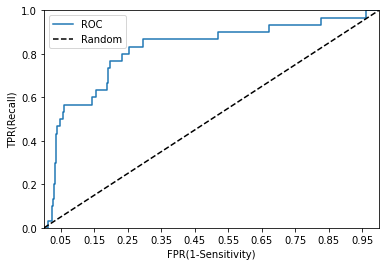

lda의 ROC AUC값: 0.8196


In [112]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lda_clf.predict_proba(X_test)[:,1])
pred_proba = lda_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))


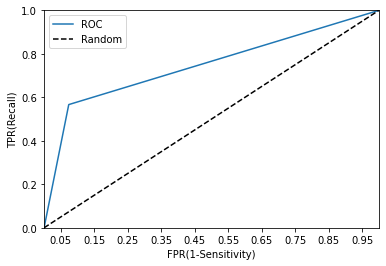

lda의 ROC AUC값: 0.7465


In [113]:
roc_curve_plot(y_test, lda_clf.predict(X_test))
roc_score = roc_auc_score(y_test, lda_pred)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))

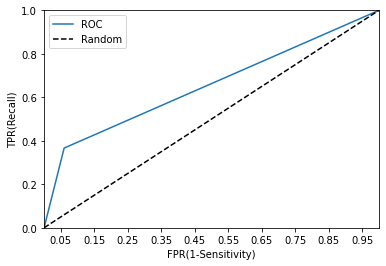

dt ROC AUC값: 0.6534


In [114]:
roc_curve_plot(y_test, dt_clf.predict_proba(X_test)[:,1])
pred_proba = dt_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('dt ROC AUC값: {0:.4f}'.format(roc_score))


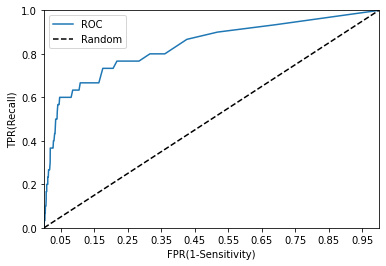

rf ROC AUC값: 0.8351


In [115]:
roc_curve_plot(y_test, rf_clf.predict_proba(X_test)[:,1])
pred_proba = rf_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('rf ROC AUC값: {0:.4f}'.format(roc_score))

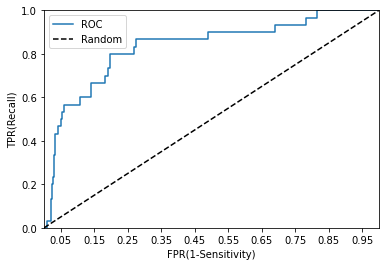

lr ROC AUC값: 0.8333


In [116]:
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])
pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('lr ROC AUC값: {0:.4f}'.format(roc_score))

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


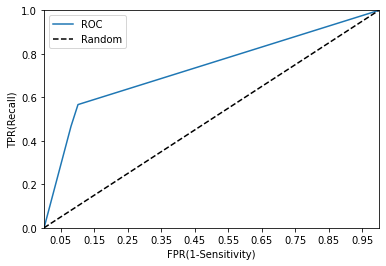

knn ROC AUC값: 0.7335


c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [117]:
roc_curve_plot(y_test, knn_clf.predict_proba(X_test)[:,1])
pred_proba = knn_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('knn ROC AUC값: {0:.4f}'.format(roc_score))